 **Project Overview**
 
This project focuses on predicting liver disease using clinical patient data. We implemented two classification models — Support Vector Machine (SVM) and Naive Bayes — to identify patients at risk based on various biochemical and demographic attributes.

 **Dataset Description**
 
The dataset contains information such as:

1. Age, Gender

2. Total Bilirubin, Direct Bilirubin

3. Alkaline Phosphotase, SGPT, SGOT

4. Total Proteins, Albumin, Albumin and Globulin Ratio

5. Target Variable: 1 (liver disease), 0 (no liver disease)

In [ ]:
%pip install pandas seaborn matplotlib scikit-learn
import pandas as pd

df = pd.read_csv("indian_liver_patient.csv")

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nValue counts (target):\n", df['Dataset'].value_counts())

df.head()


Note: you may need to restart the kernel to use updated packages.
Shape: (583, 11)

Columns: ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']

Value counts (target):
 Dataset
1    416
2    167
Name: count, dtype: int64


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


 **Exploratory Data Analysis (EDA)**

1. No missing values

2. Numeric features were scaled using StandardScaler

3. Target distribution is slightly imbalanced

4. Features like Total Bilirubin and Alkaline Phosphotase showed correlation with disease

In [ ]:
df = df.dropna()  
df.rename(columns={'Dataset': 'target'}, inplace=True)
df['target'] = df['target'].map({1: 1, 2: 0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
print("Cleaned target distribution:\n", df['target'].value_counts())


Cleaned target distribution:
 target
1    414
0    165
Name: count, dtype: int64


 **Modeling: SVM & Naive Bayes**
We trained two models:

🔷 SVM (Linear Kernel)

🔶 Gaussian Naive Bayes

Performance was measured using accuracy, confusion matrix, and classification report.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


SVM Accuracy: 71.55%


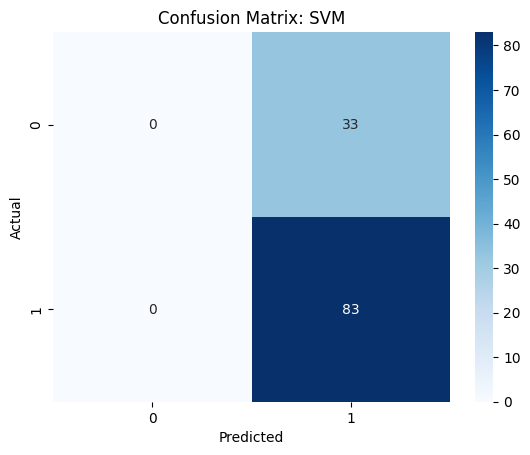

Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.72      1.00      0.83        83

    accuracy                           0.72       116
   macro avg       0.36      0.50      0.42       116
weighted avg       0.51      0.72      0.60       116



c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

svm_preds = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_acc * 100:.2f}%")

sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report - SVM:\n", classification_report(y_test, svm_preds))


Naive Bayes Accuracy: 61.21%


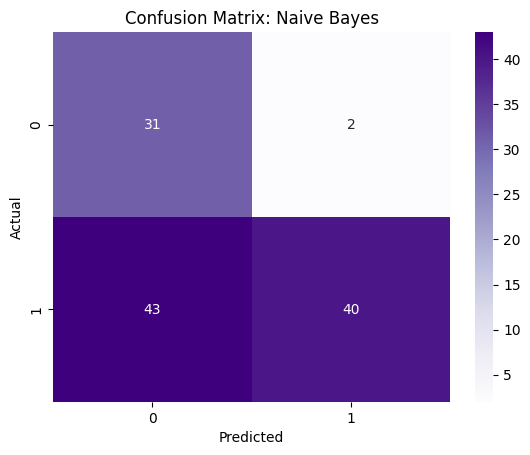

Classification Report - Naive Bayes:
               precision    recall  f1-score   support

           0       0.42      0.94      0.58        33
           1       0.95      0.48      0.64        83

    accuracy                           0.61       116
   macro avg       0.69      0.71      0.61       116
weighted avg       0.80      0.61      0.62       116



In [5]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

nb_preds = nb.predict(X_test_scaled)
nb_acc = accuracy_score(y_test, nb_preds)
print(f"Naive Bayes Accuracy: {nb_acc * 100:.2f}%")

sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report - Naive Bayes:\n", classification_report(y_test, nb_preds))


# Liver Disease Prediction Using Machine Learning

This project uses clinical patient data to predict the likelihood of liver disease using **SVM** and **Naive Bayes** models. It is part of a 15-project ML learning sprint aimed at developing healthcare-focused predictive models.

## Project Highlights
- Clinical data preprocessing & scaling
- Support Vector Machine (SVM) and Naive Bayes models
- Accuracy comparison with confusion matrices
- Medical interpretation of model outcomes
- Recommendations for future improvements

## Dataset
- Source: [Liver Disease UCI Repository or Kaggle version]
- Features include age, bilirubin levels, enzymes, proteins, and diagnosis

## Results

| Model          | Accuracy |
|----------------|----------|
| SVM            | 71.55%   |
| Naive Bayes    | 61.21%   |

SVM outperformed Naive Bayes, likely due to its robustness in handling correlated clinical features.

## Medical Insight

The model identifies **Total Bilirubin**, **Alkaline Phosphotase**, and **Albumin** as critical markers in liver disease prediction. Such models can assist in early diagnosis or decision support in clinical settings.

## Files

- `liver-disease-prediction.ipynb` – Jupyter notebook source code  
- `liver_patient_dataset.csv` – Dataset used  
- `requirements.txt` – Required libraries  
- `liver-disease-report.pdf` – (optional) Final formatted report

## Future Improvements

- Use SMOTE for imbalance  
- Tune SVM with RBF or polynomial kernels  
- Try ensemble models (XGBoost, Gradient Boosting)

## Author

Developed by **Azib Malick**  
© 2025 Azib Malick. All rights reserved.
